## Transformation Matrix

<img src="linear_transform.png">

In [104]:
x = [[3,2],[5,6]]

$A_1= \left [ \begin{bmatrix} cos(\frac{\pi}{4}) & - sin(\frac{\pi}{4}) \\ sin(\frac{\pi}{4}) & cos(\frac{\pi}{4}) \end{bmatrix} \right ]$

In [107]:
def transformation_matrix_rotate(matrix):
    # Rotate 45 degree
    theta = np.radians(45)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s),(s,c)))
    y = np.dot(matrix, R)
    return y

transformation_matrix_rotate(x)

array([[ 3.53553391, -0.70710678],
       [ 7.77817459,  0.70710678]])

$A_2= \left [ \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix} \right ]$

In [108]:
def transformation_matrix_scaling(matrix):
    A2 = [[2, 0],[0,1]]
    y = np.dot(A2, matrix)
    return y

transformation_matrix_scaling(x)

array([[6, 4],
       [5, 6]])

In [109]:
def transformation_matrix_general(matrix):
    A3 = [[3, -1],[1,-1]]
    y = np.dot(A3, matrix)
    return y

transformation_matrix_general(x)

array([[ 4,  0],
       [-2, -4]])

## Example : Image Transform using Transform matrix


Python의 ```OpenCV``` 패키지를 이용하면 이미지를 회전시키거나 대칭이동, 평행이동을 하여 쉽게 augmented image를 만들 수 있지만,

Transform matrix를 이용해서도 이미지를 변형시킬 수 있다. 

아래는 transform matrix를 이용한 image transform 예시이다.


In [96]:
import numpy as np
import matplotlib.pyplot as plt

## Load image
img_color = plt.imread('my_image.jpg')
h, w, d = img_color.shape
rotated_image = np.zeros([h, w, d])

img_red = img_color[:,:,0]
img_green = img_color[:,:,1]
img_blue = img_color[:,:,2]


## Rotating Matrix : rotate 45 degree 
theta = np.radians(45)
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])


## Image Rotating Using rotating Matrix
R = R * 3/5                                           # Scaling : 전체 사진을 1.666 (=5/3)배로 확대
points = np.mgrid[0:h, 0:w].reshape((2, w*h))         # Image 전체에 대한 grid 좌표 생성
new_points = R.dot(points).round().astype(int)        # Rotate Grid


new_points[0] = new_points[0] + 450                   # Shift Coordinate (고양이 얼굴 보이도록) 
new_points[1] = new_points[1] - 25              

x, y = new_points.reshape((2, h, w), order='F')       # Grid의 x좌표와 y좌표를 분리
indices = x + h*y                                     # Matrix의 index 형태로 좌표를 변환


rot_img_red = np.take(img_red, indices, mode='wrap')  # 각 grid에 해당하는 점의 값을 불러옴
rot_img_green = np.take(img_green, indices, mode='wrap')
rot_img_blue = np.take(img_blue, indices, mode='wrap')

rotated_image[:,:,0] = rot_img_red                    # rgb를 합침
rotated_image[:,:,1] = rot_img_green
rotated_image[:,:,2] = rot_img_blue
rotated_image /= 255                                  # uint8에서 float type으로 데이터타입이 변경됨 -> 최대값을 1로 맞춰줌

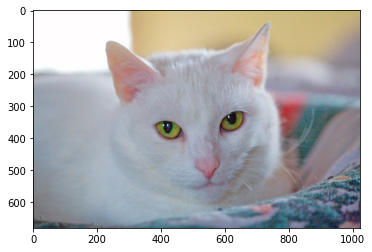

In [86]:
plt.imshow(img_color)

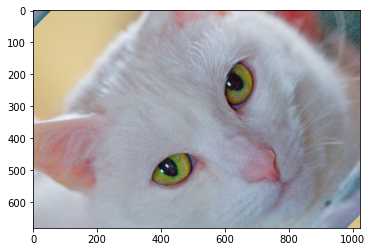

In [97]:
plt.imshow(rotated_image)

## Exercise : Basis Change

선형 사상 $\Psi : \mathbb{R}^{m} \rightarrow \mathbb{R}^n$에 대한 행렬 $A_{\Psi}$가 있다.

basis를 표준 기저(standard basis) $B \in \mathbb{R}^{m}, C \in \mathbb{R}^{n}$에서 임의의 basis $ \tilde{B} \in \mathbb{R}^{m}, \tilde{C} \in \mathbb{R}^{n}$로 바꾸려고 할 때,

행렬 $A_{\Psi}$를 input으로 받아 basis change된 행렬 $ \tilde{A}_{\Psi} $를 output으로 내는 함수를 만들어보자.

<br>

**Hint**

$\tilde{B} \rightarrow B$에 대한 행렬 $S$는 $\tilde{B} = BS$ 로 표현가능하며,

$\tilde{C} \rightarrow C$에 대한 행렬 $T$는 $\tilde{C} = CT$ 로 표현가능하다.

이러한 행렬 $T$와 $S$에 대해 $\tilde{A}_{\Psi} = T^{-1} A_{\Psi} S$이다.

In [103]:
import numpy as np

def basis_change(A, B_tilde, C_tilde):
    """
    Arguments:
    A : linear mapping matrix, size=(m,n)
    B_tilde : changed basis matrix of R^m, size=(n,n)
    C_tilde : changed basis matrix of R^n, size=(m,m)
    
    Returns:
    A_tilde : changed linear mapping matrix due to basis change, size=(m,n)    
    """

    
    
    
    return A_tilde

    

# Test sample from example 2.24
A = np.array([[1, 2, 0], [-1, 1, 3], [3, 7, 1], [-1, 2, 4]])
B = np.eye(3)
B_tilde = np.array([[1, 0, 1], [1, 1, 0], [0, 1, 1]])
C = np.eye(4)
C_tilde = np.array([[1, 1, 0, 1], [1, 0, 1, 0], [0, 1, 1, 0], [0, 0, 0, 1]])

# Then answer is
A_tilde = np.array([[-4, -4, -2], [6, 0, 0], [4, 8, 4], [1, 6, 3]], dtype=float)